## Basic setup and testing

In [ ]:
import os
drive_dir = '/content/drive/MyDrive/ITMO_HW/GenSpeech/HW2'
os.chdir(drive_dir)

In [ ]:
!pip install https://github.com/kpu/kenlm/archive/master.zip
!pip install levenshtein

     - 553.6 kB 9.6 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kenlm: filename=kenlm-0.2.0-cp311-cp311-linux_x86_64.whl size=3185040 sha256=3c797c8b21548687a4b267caf4de2795143f6a9431bb79e9ab8ae9f2fe3748fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_vyi7r8/wheels/4e/ca/6a/e5da175b1396483f6f410cdb4cfe8bc8fa5e12088e91d60413
Successfully built kenlm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 68.3 MB/s eta 0:00:00


In [ ]:
!wget https://www.openslr.org/resources/11/3-gram.pruned.3e-7.arpa.gz
!wget https://www.openslr.org/resources/11/3-gram.pruned.1e-7.arpa.gz
!wget https://www.openslr.org/resources/11/3-gram.arpa.gz
!wget https://www.openslr.org/resources/11/4-gram.arpa.gz

--2025-04-04 16:48:16--  https://www.openslr.org/resources/11/3-gram.pruned.3e-7.arpa.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://openslr.elda.org/resources/11/3-gram.pruned.3e-7.arpa.gz [following]
--2025-04-04 16:48:16--  https://openslr.elda.org/resources/11/3-gram.pruned.3e-7.arpa.gz
Resolving openslr.elda.org (openslr.elda.org)... 141.94.109.138, 2001:41d0:203:ad8a::
Connecting to openslr.elda.org (openslr.elda.org)|141.94.109.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13654242 (13M) [application/x-gzip]
Saving to: ‘3-gram.pruned.3e-7.arpa.gz’

3-gram.pruned.3e-7. 100%[===================>]  13.02M  8.35MB/s    in 1.6s    

2025-04-04 16:48:19 (8.35 MB/s) - ‘3-gram.pruned.3e-7.arpa.gz’ saved [13654242/13654242]

--2025-04-04 16:48:19--  https://www.openslr.org/resources/11/3-gram.

In [ ]:
%load_ext autoreload
%autoreload 2
from wav2vec2decoder import *

In [ ]:
test_samples = [
        ("examples/sample1.wav", "IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL READY TO ACKNOWLEDGE MYSELF YOUR DEBTOR FOR AN ACT OF THE MOST NOBLE FORBEARANCE"),
        ("examples/sample2.wav", "AND IF ANY OF THE OTHER COPS HAD PRIVATE RACKETS OF THEIR OWN IZZY WAS UNDOUBTEDLY THE MAN TO FIND IT OUT AND USE THE INFORMATION WITH A BEAT SUCH AS THAT EVEN GOING HALVES AND WITH ALL THE GRAFT TO THE UPPER BRACKETS HE'D STILL BE ABLE TO MAKE HIS PILE IN A MATTER OF MONTHS"),
        ("examples/sample3.wav", "GUESS A MAN GETS USED TO ANYTHING HELL MAYBE I CAN HIRE SOME BUMS TO SIT AROUND AND WHOOP IT UP WHEN THE SHIPS COME IN AND BILL THIS AS A REAL OLD MARTIAN DEN OF SIN"),
        ("examples/sample4.wav", "IT WAS A TUNE THEY HAD ALL HEARD HUNDREDS OF TIMES SO THERE WAS NO DIFFICULTY IN TURNING OUT A PASSABLE IMITATION OF IT TO THE IMPROVISED STRAINS OF I DIDN'T WANT TO DO IT THE PRISONER STRODE FORTH TO FREEDOM"),
        ("examples/sample5.wav", "MARGUERITE TIRED OUT WITH THIS LONG CONFESSION THREW HERSELF BACK ON THE SOFA AND TO STIFLE A SLIGHT COUGH PUT UP HER HANDKERCHIEF TO HER LIPS AND FROM THAT TO HER EYES"),
        ("examples/sample6.wav", "AT THIS TIME ALL PARTICIPANTS ARE IN A LISTEN ONLY MODE"),
        ("examples/sample7.wav", "THE INCREASE WAS MAINLY ATTRIBUTABLE TO THE NET INCREASE IN THE AVERAGE SIZE OF OUR FLEETS"),
        ("examples/sample8.wav", "OPERATING SURPLUS IS A NON CAP FINANCIAL MEASURE WHICH IS DEFINED AS FULLY IN OUR PRESS RELEASE"),
]

In [ ]:
decoder = Wav2Vec2Decoder()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
_ = [test(decoder, audio_path, target) for audio_path, target in test_samples]

Using device: cuda
Target transcription
IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL READY TO ACKNOWLEDGE MYSELF YOUR DEBTOR FOR AN ACT OF THE MOST NOBLE FORBEARANCE
------------------------------------------------------------
greedy decoding
IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL RETER TO ACKNOWLEDGE MYSELF YOUR DEPTOR FOR AN ACT OF MOST NOBLE FORBEARANCE 
Character-level Levenshtein distance: 8
------------------------------------------------------------
beam decoding
IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL RETER TO ACKNOWLEDGE MYSELF YOUR DEPTOR FOR AN ACT OF MOST NOBLE FORBEARANCE 
Character-level Levenshtein distance: 8
------------------------------------------------------------
beam_lm decoding
IF YOU ARE GENEROUS HERE IS A FITTING 

## Comparing the decoding methods in terms of Normalized Levenshtein distances

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import Levenshtein
from tqdm import tqdm

In [ ]:
def normalized_levenshtein(s1, s2):
    if len(s1) == 0 and len(s2) == 0:
        return 0.0
    return Levenshtein.distance(s1, s2) / max(len(s1), len(s2))

In [ ]:
def run_experiment(decoder, test_samples):
    results = {
        "greedy": [],
        "beam": [],
        "beam_lm": [],
        "beam_lm_rescore": []
    }

    for i, (audio_path, reference) in enumerate(test_samples):
        print(f"Processing sample {i+1}/{len(test_samples)}: {audio_path}")

        audio_input, sr = torchaudio.load(audio_path)
        assert sr == 16000, "Audio sample rate must be 16kHz"

        for method in results.keys():
            transcript = decoder.decode(audio_input, method=method)
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[method].append(norm_dist)
            print(f"  {method}: {norm_dist:.4f}")

    return results

In [ ]:
def save_results(results):
    stats = {}

    with open("results/decoding_comparison_report.txt", "w") as f:
        f.write("DECODING METHODS COMPARISON REPORT\n")
        f.write("=================================\n\n")

        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for method, scores in results.items():
            mean = np.mean(scores)
            std = np.std(scores)
            var = np.var(scores)

            stats[method] = {
                "mean": mean,
                "std": std,
                "var": var,
                "raw_scores": scores
            }

            f.write(f"{method.upper()} DECODING:\n")
            f.write(f"  Mean: {mean:.4f}\n")
            f.write(f"  Std:  {std:.4f}\n")
            f.write(f"  Var:  {var:.4f}\n")
            f.write(f"  Raw scores: {[f'{s:.4f}' for s in scores]}\n\n")

        best_method = min(stats.items(), key=lambda x: x[1]["mean"])[0]
        f.write(f"SUMMARY:\n")
        f.write(f"Best performing method: {best_method.upper()} (mean normalized distance: {stats[best_method]['mean']:.4f})\n")

    print(f"Report saved to decoding_comparison_report.txt")
    return stats

In [ ]:
def plot_results(stats):
    methods = list(stats.keys())
    means = [stats[m]["mean"] for m in methods]
    stds = [stats[m]["std"] for m in methods]

    labels = [m.replace('_', ' ').title() for m in methods]

    plt.figure(figsize=(10, 6))

    bars = plt.bar(np.arange(len(methods)), means, yerr=stds,
                  capsize=10, color='skyblue', edgecolor='black')

    for bar, mean in zip(bars, means):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

    plt.xlabel('Decoding Method', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Comparison of Wav2Vec2 Decoding Methods', fontsize=16)

    plt.xticks(np.arange(len(methods)), labels)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.savefig('results/decoding_comparison_plot.png', dpi=300, bbox_inches='tight')
    print(f"Plot saved to decoding_comparison_plot.png")

    plt.show()

In [ ]:
def run_decoding_comparison():
    test_samples = [
        ("examples/sample1.wav", "IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL READY TO ACKNOWLEDGE MYSELF YOUR DEBTOR FOR AN ACT OF THE MOST NOBLE FORBEARANCE"),
        ("examples/sample2.wav", "AND IF ANY OF THE OTHER COPS HAD PRIVATE RACKETS OF THEIR OWN IZZY WAS UNDOUBTEDLY THE MAN TO FIND IT OUT AND USE THE INFORMATION WITH A BEAT SUCH AS THAT EVEN GOING HALVES AND WITH ALL THE GRAFT TO THE UPPER BRACKETS HE'D STILL BE ABLE TO MAKE HIS PILE IN A MATTER OF MONTHS"),
        ("examples/sample3.wav", "GUESS A MAN GETS USED TO ANYTHING HELL MAYBE I CAN HIRE SOME BUMS TO SIT AROUND AND WHOOP IT UP WHEN THE SHIPS COME IN AND BILL THIS AS A REAL OLD MARTIAN DEN OF SIN"),
        ("examples/sample4.wav", "IT WAS A TUNE THEY HAD ALL HEARD HUNDREDS OF TIMES SO THERE WAS NO DIFFICULTY IN TURNING OUT A PASSABLE IMITATION OF IT TO THE IMPROVISED STRAINS OF I DIDN'T WANT TO DO IT THE PRISONER STRODE FORTH TO FREEDOM"),
        ("examples/sample5.wav", "MARGUERITE TIRED OUT WITH THIS LONG CONFESSION THREW HERSELF BACK ON THE SOFA AND TO STIFLE A SLIGHT COUGH PUT UP HER HANDKERCHIEF TO HER LIPS AND FROM THAT TO HER EYES"),
        ("examples/sample6.wav", "AT THIS TIME ALL PARTICIPANTS ARE IN A LISTEN ONLY MODE"),
        ("examples/sample7.wav", "THE INCREASE WAS MAINLY ATTRIBUTABLE TO THE NET INCREASE IN THE AVERAGE SIZE OF OUR FLEETS"),
        ("examples/sample8.wav", "OPERATING SURPLUS IS A NON CAP FINANCIAL MEASURE WHICH IS DEFINED AS FULLY IN OUR PRESS RELEASE"),
    ]

    print("Running experiments...")
    results = run_experiment(decoder, test_samples)

    print("Generating report...")
    stats = save_results(results)

    print("Creating visualization...")
    plot_results(stats)

Running experiments...
Processing sample 1/8: examples/sample1.wav
  greedy: 0.0390
  beam: 0.0390
  beam_lm: 0.0439
  beam_lm_rescore: 0.0390
Processing sample 2/8: examples/sample2.wav
  greedy: 0.0000
  beam: 0.0000
  beam_lm: 0.0072
  beam_lm_rescore: 0.0000
Processing sample 3/8: examples/sample3.wav
  greedy: 0.0061
  beam: 0.0061
  beam_lm: 0.0061
  beam_lm_rescore: 0.0061
Processing sample 4/8: examples/sample4.wav
  greedy: 0.0191
  beam: 0.0191
  beam_lm: 0.0144
  beam_lm_rescore: 0.0191
Processing sample 5/8: examples/sample5.wav
  greedy: 0.0060
  beam: 0.0060
  beam_lm: 0.0000
  beam_lm_rescore: 0.0060
Processing sample 6/8: examples/sample6.wav
  greedy: 0.2727
  beam: 0.2727
  beam_lm: 0.2909
  beam_lm_rescore: 0.2727
Processing sample 7/8: examples/sample7.wav
  greedy: 0.1889
  beam: 0.1889
  beam_lm: 0.1889
  beam_lm_rescore: 0.1889
Processing sample 8/8: examples/sample8.wav
  greedy: 0.1474
  beam: 0.1474
  beam_lm: 0.1684
  beam_lm_rescore: 0.1474
Generating report

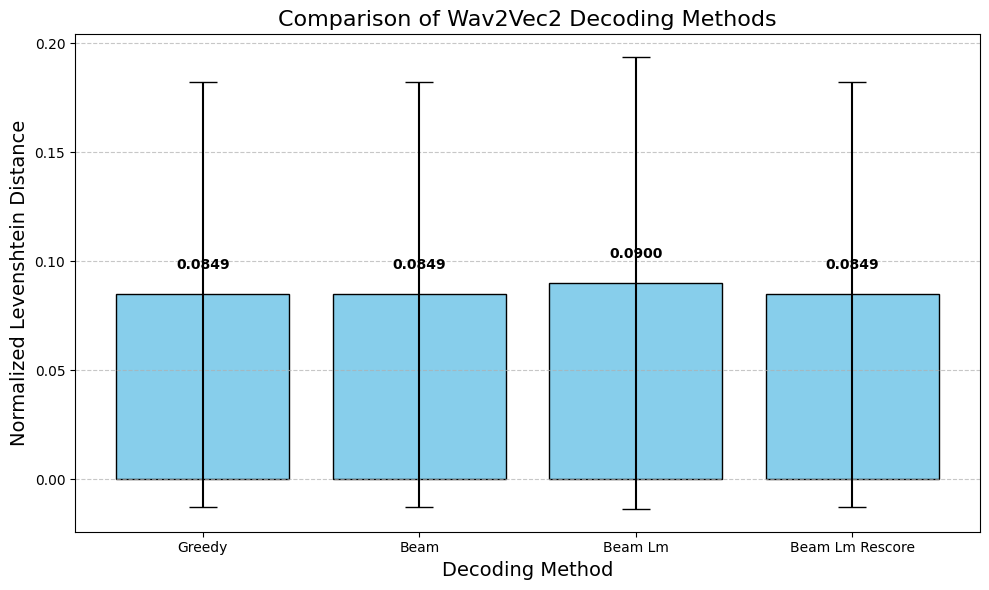

In [ ]:
run_decoding_comparison()

## Different parameters for beam_search_decode

In [ ]:
def experiment_beam_width():
    beam_widths = [1, 2, 3, 5, 8]
    results = {bw: [] for bw in beam_widths}

    samples = [
        ("examples/sample1.wav", "IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL READY TO ACKNOWLEDGE MYSELF YOUR DEBTOR FOR AN ACT OF THE MOST NOBLE FORBEARANCE"),
        ("examples/sample2.wav", "AND IF ANY OF THE OTHER COPS HAD PRIVATE RACKETS OF THEIR OWN IZZY WAS UNDOUBTEDLY THE MAN TO FIND IT OUT AND USE THE INFORMATION WITH A BEAT SUCH AS THAT EVEN GOING HALVES AND WITH ALL THE GRAFT TO THE UPPER BRACKETS HE'D STILL BE ABLE TO MAKE HIS PILE IN A MATTER OF MONTHS"),
        ("examples/sample3.wav", "GUESS A MAN GETS USED TO ANYTHING HELL MAYBE I CAN HIRE SOME BUMS TO SIT AROUND AND WHOOP IT UP WHEN THE SHIPS COME IN AND BILL THIS AS A REAL OLD MARTIAN DEN OF SIN"),
        ("examples/sample4.wav", "IT WAS A TUNE THEY HAD ALL HEARD HUNDREDS OF TIMES SO THERE WAS NO DIFFICULTY IN TURNING OUT A PASSABLE IMITATION OF IT TO THE IMPROVISED STRAINS OF I DIDN'T WANT TO DO IT THE PRISONER STRODE FORTH TO FREEDOM"),
        ("examples/sample5.wav", "MARGUERITE TIRED OUT WITH THIS LONG CONFESSION THREW HERSELF BACK ON THE SOFA AND TO STIFLE A SLIGHT COUGH PUT UP HER HANDKERCHIEF TO HER LIPS AND FROM THAT TO HER EYES"),
        ("examples/sample6.wav", "AT THIS TIME ALL PARTICIPANTS ARE IN A LISTEN ONLY MODE"),
        ("examples/sample7.wav", "THE INCREASE WAS MAINLY ATTRIBUTABLE TO THE NET INCREASE IN THE AVERAGE SIZE OF OUR FLEETS"),
        ("examples/sample8.wav", "OPERATING SURPLUS IS A NON CAP FINANCIAL MEASURE WHICH IS DEFINED AS FULLY IN OUR PRESS RELEASE"),
    ]

    print("Running beam width experiment for beam_search_decode...")
    for beam_width in tqdm(beam_widths):
        decoder = Wav2Vec2Decoder(beam_width=beam_width)

        for audio_path, reference in samples:
            audio_input, sr = torchaudio.load(audio_path)
            assert sr == 16000, "Audio sample rate must be 16kHz"

            transcript = decoder.decode(audio_input, method="beam")
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[beam_width].append(norm_dist)

    stats = {}
    for bw, scores in results.items():
        stats[bw] = {
            "mean": np.mean(scores),
            "std": np.std(scores),
            "median": np.median(scores),
            "min": np.min(scores),
            "max": np.max(scores),
            "raw_scores": scores
        }

    plt.figure(figsize=(10, 6))
    means = [stats[bw]["mean"] for bw in beam_widths]
    stds = [stats[bw]["std"] for bw in beam_widths]

    plt.errorbar(beam_widths, means, yerr=stds, marker='o', linestyle='-', capsize=5)
    plt.xlabel('Beam Width', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Beam Width on ASR Performance', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(beam_widths)

    plt.tight_layout()
    plt.savefig('results/beam_width_experiment.png', dpi=300)

    with open('results/beam_width_results.txt', 'w') as f:
        f.write("BEAM WIDTH EXPERIMENT RESULTS\n")
        f.write("============================\n\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for bw in beam_widths:
            f.write(f"BEAM WIDTH = {bw}:\n")
            f.write(f"  Mean: {stats[bw]['mean']:.4f}\n")
            f.write(f"  Std:  {stats[bw]['std']:.4f}\n")
            f.write(f"  Median: {stats[bw]['median']:.4f}\n")
            f.write(f"  Min: {stats[bw]['min']:.4f}\n")
            f.write(f"  Max: {stats[bw]['max']:.4f}\n")
            f.write(f"  Raw scores by sample: {[f'{score:.4f}' for score in stats[bw]['raw_scores']]}\n\n")

    plt.figure(figsize=(14, 8))

    sample_names = [f"Sample {i+1}" for i in range(len(samples))]

    bar_width = 0.8 / len(beam_widths)

    for i, bw in enumerate(beam_widths):
        scores = stats[bw]["raw_scores"]

        x_pos = np.arange(len(samples)) + i * bar_width - 0.4 + bar_width/2

        plt.bar(x_pos, scores, width=bar_width, label=f'Beam Width={bw}')

    plt.xlabel('Audio Sample', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Beam Width on ASR Performance by Sample', fontsize=16)
    plt.xticks(np.arange(len(samples)), sample_names)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('results/beam_width_by_sample.png', dpi=300)

    return stats

Running beam width experiment for beam_search_decode...


  0%|          | 0/5 [00:00<?, ?it/s]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 20%|██        | 1/5 [00:08<00:34,  8.58s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 40%|████      | 2/5 [00:18<00:28,  9.56s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 60%|██████    | 3/5 [00:31<00:21, 10.9

{1: {'mean': np.float64(0.08489508948831798),
  'std': np.float64(0.0975195981610057),
  'median': np.float64(0.02908157311238184),
  'min': np.float64(0.0),
  'max': np.float64(0.2727272727272727),
  'raw_scores': [0.03902439024390244,
   0.0,
   0.006060606060606061,
   0.019138755980861243,
   0.005952380952380952,
   0.2727272727272727,
   0.18888888888888888,
   0.14736842105263157]},
 2: {'mean': np.float64(0.08489508948831798),
  'std': np.float64(0.0975195981610057),
  'median': np.float64(0.02908157311238184),
  'min': np.float64(0.0),
  'max': np.float64(0.2727272727272727),
  'raw_scores': [0.03902439024390244,
   0.0,
   0.006060606060606061,
   0.019138755980861243,
   0.005952380952380952,
   0.2727272727272727,
   0.18888888888888888,
   0.14736842105263157]},
 3: {'mean': np.float64(0.08489508948831798),
  'std': np.float64(0.0975195981610057),
  'median': np.float64(0.02908157311238184),
  'min': np.float64(0.0),
  'max': np.float64(0.2727272727272727),
  'raw_scores':

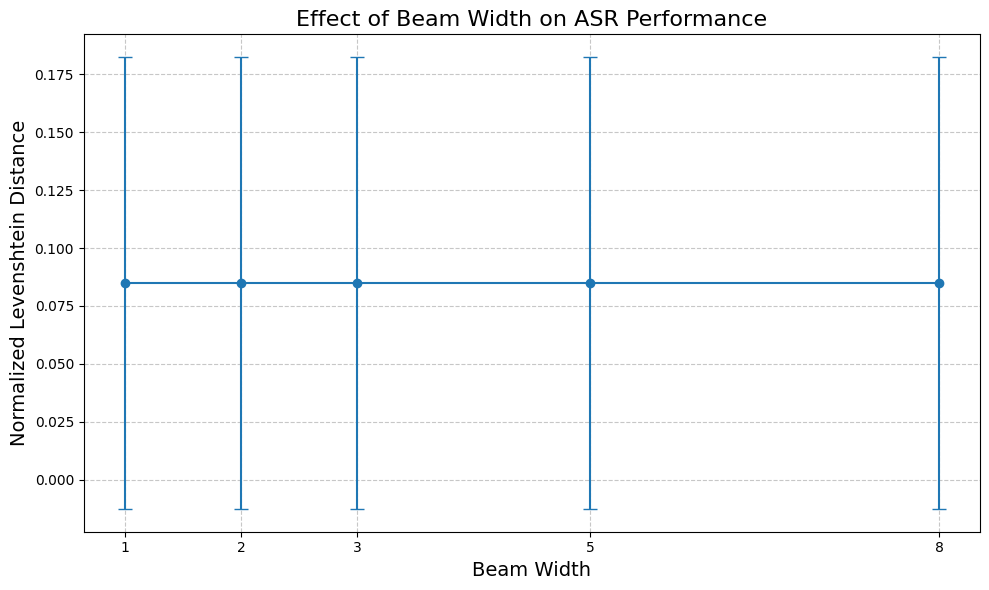

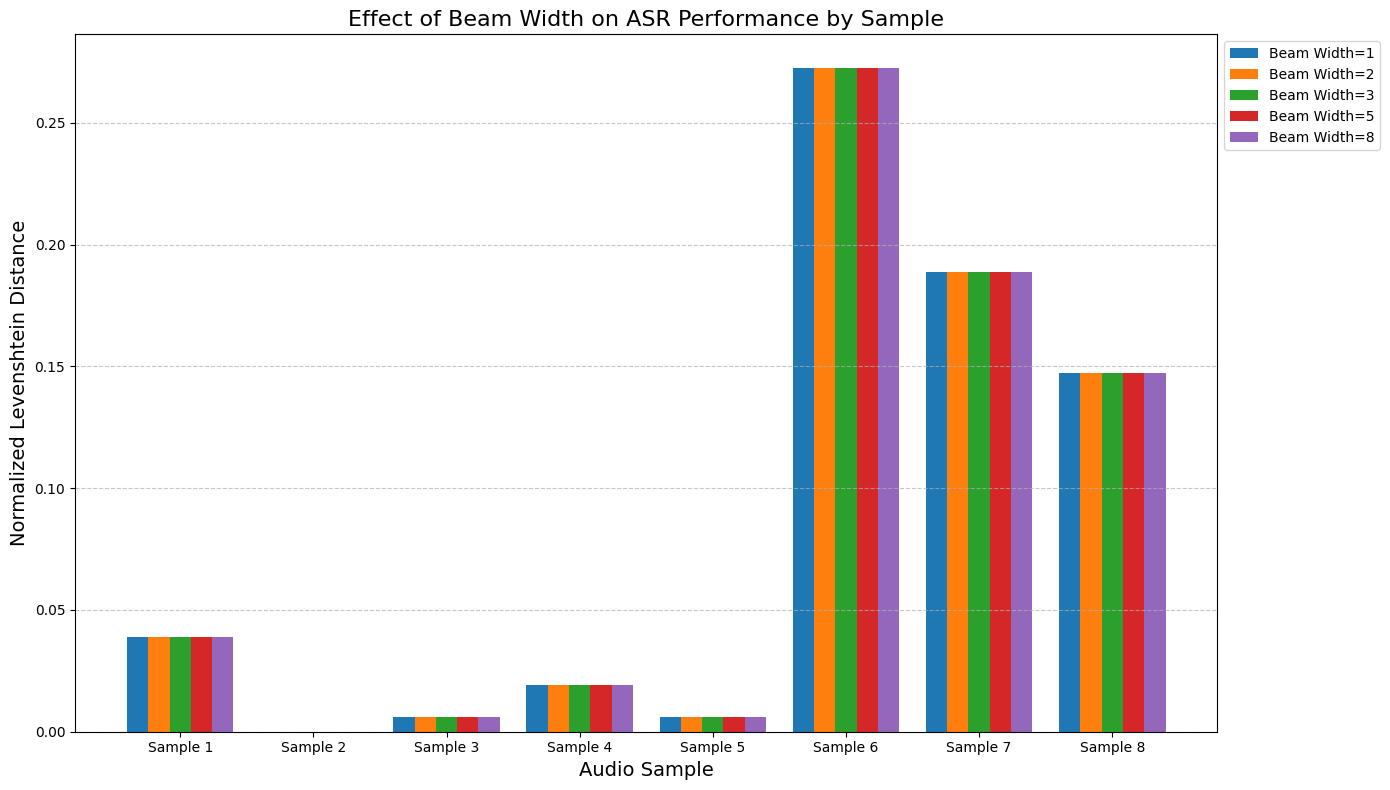

In [ ]:
experiment_beam_width()

## Different parameters for beam_search_with_lm

In [ ]:
def test_samples():
    return [
        ("examples/sample1.wav", "IF YOU ARE GENEROUS HERE IS A FITTING OPPORTUNITY FOR THE EXERCISE OF YOUR MAGNANIMITY IF YOU ARE PROUD HERE AM I YOUR RIVAL READY TO ACKNOWLEDGE MYSELF YOUR DEBTOR FOR AN ACT OF THE MOST NOBLE FORBEARANCE"),
        ("examples/sample2.wav", "AND IF ANY OF THE OTHER COPS HAD PRIVATE RACKETS OF THEIR OWN IZZY WAS UNDOUBTEDLY THE MAN TO FIND IT OUT AND USE THE INFORMATION WITH A BEAT SUCH AS THAT EVEN GOING HALVES AND WITH ALL THE GRAFT TO THE UPPER BRACKETS HE'D STILL BE ABLE TO MAKE HIS PILE IN A MATTER OF MONTHS"),
        ("examples/sample3.wav", "GUESS A MAN GETS USED TO ANYTHING HELL MAYBE I CAN HIRE SOME BUMS TO SIT AROUND AND WHOOP IT UP WHEN THE SHIPS COME IN AND BILL THIS AS A REAL OLD MARTIAN DEN OF SIN"),
        ("examples/sample4.wav", "IT WAS A TUNE THEY HAD ALL HEARD HUNDREDS OF TIMES SO THERE WAS NO DIFFICULTY IN TURNING OUT A PASSABLE IMITATION OF IT TO THE IMPROVISED STRAINS OF I DIDN'T WANT TO DO IT THE PRISONER STRODE FORTH TO FREEDOM"),
        ("examples/sample5.wav", "MARGUERITE TIRED OUT WITH THIS LONG CONFESSION THREW HERSELF BACK ON THE SOFA AND TO STIFLE A SLIGHT COUGH PUT UP HER HANDKERCHIEF TO HER LIPS AND FROM THAT TO HER EYES"),
        ("examples/sample6.wav", "AT THIS TIME ALL PARTICIPANTS ARE IN A LISTEN ONLY MODE"),
        ("examples/sample7.wav", "THE INCREASE WAS MAINLY ATTRIBUTABLE TO THE NET INCREASE IN THE AVERAGE SIZE OF OUR FLEETS"),
        ("examples/sample8.wav", "OPERATING SURPLUS IS A NON CAP FINANCIAL MEASURE WHICH IS DEFINED AS FULLY IN OUR PRESS RELEASE"),
    ]

def experiment_beam_width_lm():
    beam_widths = [1, 3, 5, 10]
    results = {bw: [] for bw in beam_widths}

    samples = test_samples()

    print("Testing beam width for beam_search_with_lm...")
    for beam_width in tqdm(beam_widths):
        decoder = Wav2Vec2Decoder(beam_width=beam_width)

        for audio_path, reference in samples:
            audio_input, sr = torchaudio.load(audio_path)
            assert sr == 16000, "Audio sample rate must be 16kHz"

            transcript = decoder.decode(audio_input, method="beam_lm")
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[beam_width].append(norm_dist)

    stats = {}
    for bw, scores in results.items():
        stats[bw] = {
            "mean": np.mean(scores),
            "std": np.std(scores)
        }

    plt.figure(figsize=(10, 6))
    means = [stats[bw]["mean"] for bw in beam_widths]
    stds = [stats[bw]["std"] for bw in beam_widths]

    plt.errorbar(beam_widths, means, yerr=stds, marker='o', linestyle='-', capsize=5)
    plt.xlabel('Beam Width (alpha=1.0, beta=1.0)', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Beam Width on beam_search_with_lm Performance', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(beam_widths)

    plt.tight_layout()
    plt.savefig('results/beam_width_lm_experiment.png', dpi=300)

    with open('results/beam_width_lm_results.txt', 'w') as f:
        f.write("BEAM WIDTH WITH LM EXPERIMENT RESULTS\n")
        f.write("===================================\n\n")
        f.write("alpha=1.0, beta=1.0\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for bw in beam_widths:
            f.write(f"BEAM WIDTH = {bw}:\n")
            f.write(f"  Mean: {stats[bw]['mean']:.4f}\n")
            f.write(f"  Std:  {stats[bw]['std']:.4f}\n\n")

    return stats

def experiment_alpha_lm():
    alpha_values = [0.0, 0.5, 1.0, 2.0]
    results = {a: [] for a in alpha_values}

    samples = test_samples()

    print("Testing alpha (LM weight) for beam_search_with_lm...")
    for alpha in tqdm(alpha_values):
        decoder = Wav2Vec2Decoder(alpha=alpha)

        for audio_path, reference in samples:
            audio_input, sr = torchaudio.load(audio_path)

            transcript = decoder.decode(audio_input, method="beam_lm")
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[alpha].append(norm_dist)

    stats = {}
    for a, scores in results.items():
        stats[a] = {
            "mean": np.mean(scores),
            "std": np.std(scores)
        }

    plt.figure(figsize=(10, 6))
    means = [stats[a]["mean"] for a in alpha_values]
    stds = [stats[a]["std"] for a in alpha_values]

    plt.errorbar(alpha_values, means, yerr=stds, marker='o', linestyle='-', capsize=5)
    plt.xlabel('LM Weight - Alpha (beam_width=3, beta=1.0)', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Alpha on beam_search_with_lm Performance', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(alpha_values)

    plt.tight_layout()
    plt.savefig('results/alpha_lm_experiment.png', dpi=300)

    with open('results/alpha_lm_results.txt', 'w') as f:
        f.write("ALPHA (LM WEIGHT) WITH LM EXPERIMENT RESULTS\n")
        f.write("==========================================\n\n")
        f.write("beam_width=3, beta=1.0\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for a in alpha_values:
            f.write(f"ALPHA = {a}:\n")
            f.write(f"  Mean: {stats[a]['mean']:.4f}\n")
            f.write(f"  Std:  {stats[a]['std']:.4f}\n\n")

    return stats

def experiment_beta_lm():
    beta_values = [0.0, 0.5, 1.0, 2.0]
    results = {b: [] for b in beta_values}

    samples = test_samples()

    print("Testing beta (word bonus) for beam_search_with_lm...")
    for beta in tqdm(beta_values):
        decoder = Wav2Vec2Decoder(beta=beta)

        for audio_path, reference in samples:
            audio_input, sr = torchaudio.load(audio_path)

            transcript = decoder.decode(audio_input, method="beam_lm")
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[beta].append(norm_dist)

    stats = {}
    for b, scores in results.items():
        stats[b] = {
            "mean": np.mean(scores),
            "std": np.std(scores)
        }

    plt.figure(figsize=(10, 6))
    means = [stats[b]["mean"] for b in beta_values]
    stds = [stats[b]["std"] for b in beta_values]

    plt.errorbar(beta_values, means, yerr=stds, marker='o', linestyle='-', capsize=5)
    plt.xlabel('Word Bonus - Beta (beam_width=3, alpha=1.0)', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Beta on beam_search_with_lm Performance', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(beta_values)

    plt.tight_layout()
    plt.savefig('results/beta_lm_experiment.png', dpi=300)

    with open('results/beta_lm_results.txt', 'w') as f:
        f.write("BETA (WORD BONUS) WITH LM EXPERIMENT RESULTS\n")
        f.write("=========================================\n\n")
        f.write("beam_width=3, alpha=1.0\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for b in beta_values:
            f.write(f"BETA = {b}:\n")
            f.write(f"  Mean: {stats[b]['mean']:.4f}\n")
            f.write(f"  Std:  {stats[b]['std']:.4f}\n\n")

    return stats

In [ ]:
def run_experiments():
    print("Starting parameter tuning for beam_search_with_lm...")

    beam_width_stats = experiment_beam_width_lm()
    alpha_stats = experiment_alpha_lm()
    beta_stats = experiment_beta_lm()

    print("All experiments completed! Results saved to 'results' directory.")
    return {
        "beam_width": beam_width_stats,
        "alpha": alpha_stats,
        "beta": beta_stats
    }

Starting parameter tuning for beam_search_with_lm...
Testing beam width for beam_search_with_lm...


  0%|          | 0/4 [00:00<?, ?it/s]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 25%|██▌       | 1/4 [00:07<00:22,  7.64s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 50%|█████     | 2/4 [00:20<00:21, 10.87s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 75%|███████▌  | 3/4 [00:39<00:14, 14.3

Testing alpha (LM weight) for beam_search_with_lm...


  0%|          | 0/4 [00:00<?, ?it/s]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 25%|██▌       | 1/4 [00:13<00:41, 13.67s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 50%|█████     | 2/4 [00:28<00:28, 14.49s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 75%|███████▌  | 3/4 [00:42<00:14, 14.0

Testing beta (word bonus) for beam_search_with_lm...


  0%|          | 0/4 [00:00<?, ?it/s]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 25%|██▌       | 1/4 [00:13<00:40, 13.49s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 50%|█████     | 2/4 [00:27<00:28, 14.05s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 75%|███████▌  | 3/4 [00:41<00:13, 13.9

All experiments completed! Results saved to 'results' directory.


{'beam_width': {1: {'mean': np.float64(0.09028611861300438),
   'std': np.float64(0.10353477516810501)},
  3: {'mean': np.float64(0.08998144140615327),
   'std': np.float64(0.1037570324914573)},
  5: {'mean': np.float64(0.08952854285542863),
   'std': np.float64(0.10412443897957883)},
  10: {'mean': np.float64(0.09012452748673934),
   'std': np.float64(0.10358442835822944)}},
 'alpha': {0.0: {'mean': np.float64(0.08262236221559072),
   'std': np.float64(0.09323329018752506)},
  0.5: {'mean': np.float64(0.08793932234100789),
   'std': np.float64(0.10157566440092555)},
  1.0: {'mean': np.float64(0.08998144140615327),
   'std': np.float64(0.1037570324914573)},
  2.0: {'mean': np.float64(0.129862700705092),
   'std': np.float64(0.11452824052384865)}},
 'beta': {0.0: {'mean': np.float64(0.0922453741197811),
   'std': np.float64(0.10193871979401124)},
  0.5: {'mean': np.float64(0.0905783057692557),
   'std': np.float64(0.1029800064629204)},
  1.0: {'mean': np.float64(0.08998144140615327),
  

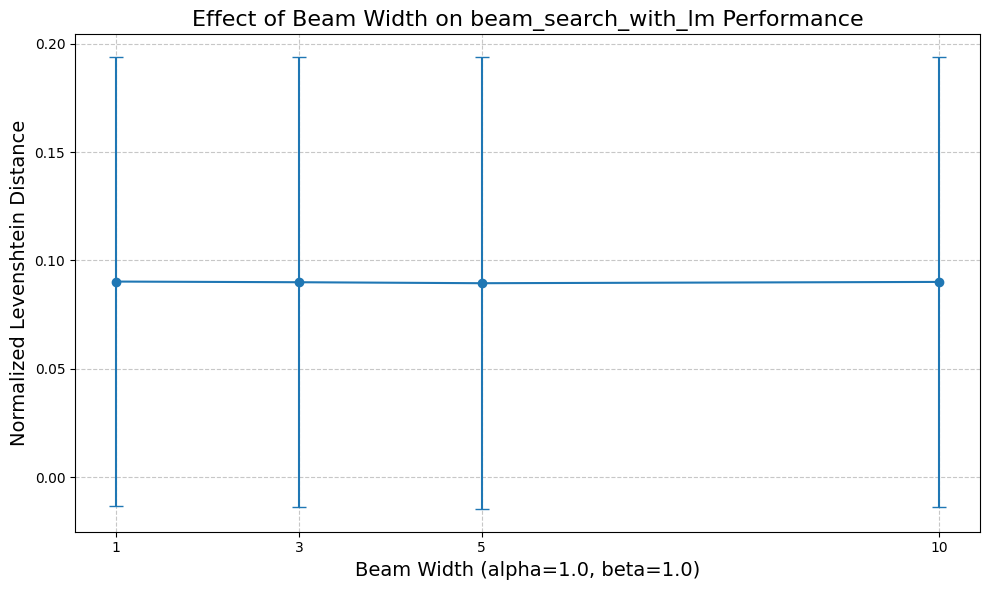

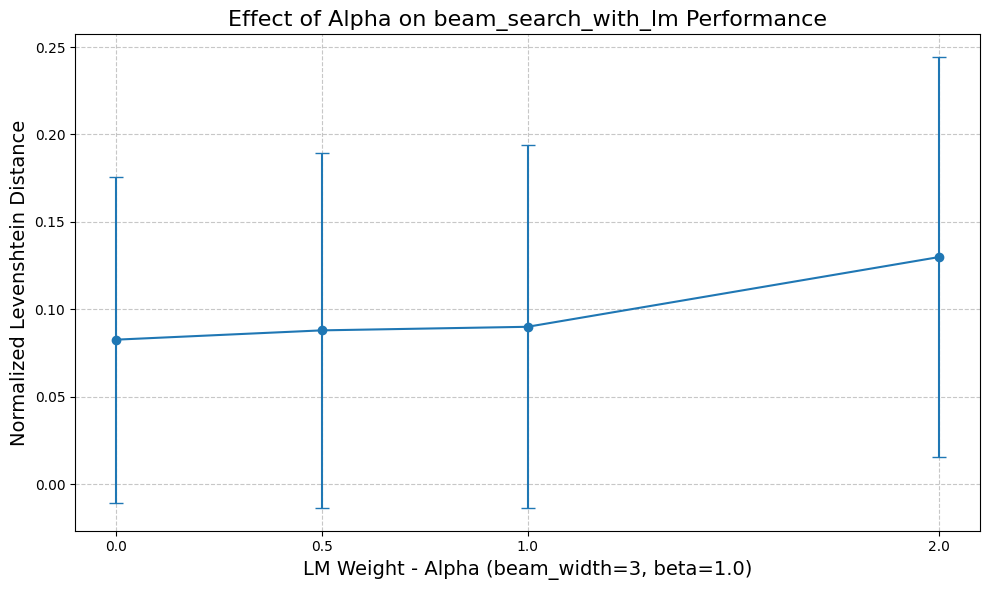

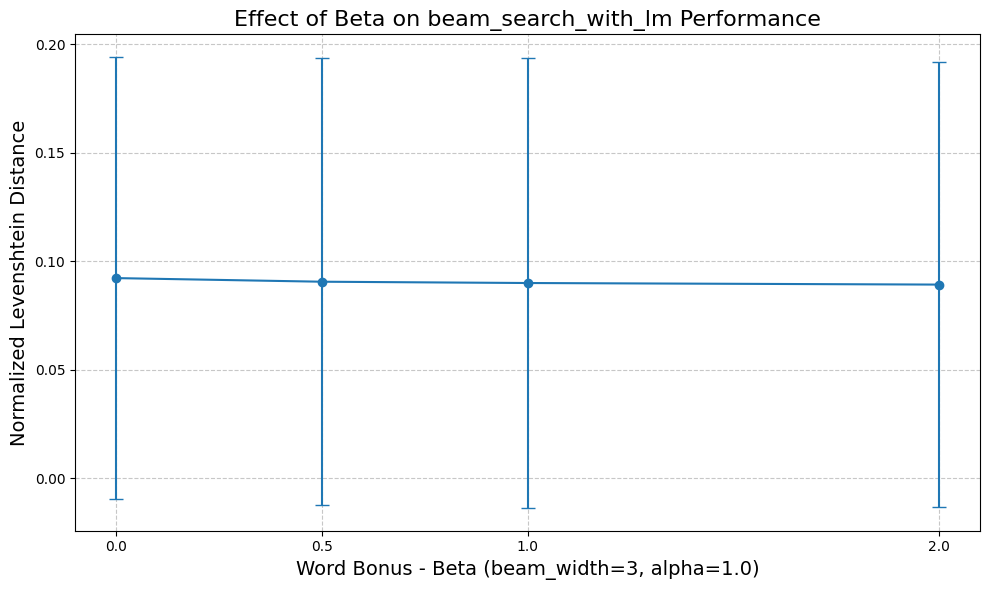

In [ ]:
run_experiments()

## Different parameters for lm_rescore

In [ ]:
def experiment_beam_width_rescore():
    beam_widths = [1, 3, 5, 10]
    results = {bw: [] for bw in beam_widths}

    samples = test_samples()

    print("Testing beam width for beam_lm_rescore...")
    for beam_width in tqdm(beam_widths):
        decoder = Wav2Vec2Decoder(beam_width=beam_width)

        for audio_path, reference in samples:
            audio_input, sr = torchaudio.load(audio_path)
            assert sr == 16000, "Audio sample rate must be 16kHz"

            transcript = decoder.decode(audio_input, method="beam_lm_rescore")
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[beam_width].append(norm_dist)

    stats = {}
    for bw, scores in results.items():
        stats[bw] = {
            "mean": np.mean(scores),
            "std": np.std(scores)
        }

    plt.figure(figsize=(10, 6))
    means = [stats[bw]["mean"] for bw in beam_widths]
    stds = [stats[bw]["std"] for bw in beam_widths]

    plt.errorbar(beam_widths, means, yerr=stds, marker='o', linestyle='-', capsize=5)
    plt.xlabel('Beam Width (alpha=1.0, beta=1.0)', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Beam Width on beam_lm_rescore Performance', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(beam_widths)

    plt.tight_layout()
    plt.savefig('results/beam_width_rescore_experiment.png', dpi=300)

    with open('results/beam_width_rescore_results.txt', 'w') as f:
        f.write("BEAM WIDTH WITH RESCORE EXPERIMENT RESULTS\n")
        f.write("========================================\n\n")
        f.write("alpha=1.0, beta=1.0\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for bw in beam_widths:
            f.write(f"BEAM WIDTH = {bw}:\n")
            f.write(f"  Mean: {stats[bw]['mean']:.4f}\n")
            f.write(f"  Std:  {stats[bw]['std']:.4f}\n\n")

    return stats

def experiment_alpha_rescore():
    alpha_values = [0.0, 0.5, 1.0, 2.0]
    results = {a: [] for a in alpha_values}

    samples = test_samples()

    print("Testing alpha (LM weight) for beam_lm_rescore...")
    for alpha in tqdm(alpha_values):
        decoder = Wav2Vec2Decoder(alpha=alpha)

        for audio_path, reference in samples:
            audio_input, sr = torchaudio.load(audio_path)

            transcript = decoder.decode(audio_input, method="beam_lm_rescore")
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[alpha].append(norm_dist)

    stats = {}
    for a, scores in results.items():
        stats[a] = {
            "mean": np.mean(scores),
            "std": np.std(scores)
        }

    plt.figure(figsize=(10, 6))
    means = [stats[a]["mean"] for a in alpha_values]
    stds = [stats[a]["std"] for a in alpha_values]

    plt.errorbar(alpha_values, means, yerr=stds, marker='o', linestyle='-', capsize=5)
    plt.xlabel('LM Weight - Alpha (beam_width=3, beta=1.0)', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Alpha on beam_lm_rescore Performance', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(alpha_values)

    plt.tight_layout()
    plt.savefig('results/alpha_rescore_experiment.png', dpi=300)

    with open('results/alpha_rescore_results.txt', 'w') as f:
        f.write("ALPHA (LM WEIGHT) WITH RESCORE EXPERIMENT RESULTS\n")
        f.write("===============================================\n\n")
        f.write("beam_width=3, beta=1.0\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for a in alpha_values:
            f.write(f"ALPHA = {a}:\n")
            f.write(f"  Mean: {stats[a]['mean']:.4f}\n")
            f.write(f"  Std:  {stats[a]['std']:.4f}\n\n")

    return stats

def experiment_beta_rescore():
    beta_values = [0.0, 0.5, 1.0, 2.0]
    results = {b: [] for b in beta_values}

    samples = test_samples()

    print("Testing beta (word bonus) for beam_lm_rescore...")
    for beta in tqdm(beta_values):
        decoder = Wav2Vec2Decoder(beta=beta)

        for audio_path, reference in samples:
            audio_input, sr = torchaudio.load(audio_path)

            transcript = decoder.decode(audio_input, method="beam_lm_rescore")
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())
            results[beta].append(norm_dist)

    stats = {}
    for b, scores in results.items():
        stats[b] = {
            "mean": np.mean(scores),
            "std": np.std(scores)
        }

    plt.figure(figsize=(10, 6))
    means = [stats[b]["mean"] for b in beta_values]
    stds = [stats[b]["std"] for b in beta_values]

    plt.errorbar(beta_values, means, yerr=stds, marker='o', linestyle='-', capsize=5)
    plt.xlabel('Word Bonus - Beta (beam_width=3, alpha=1.0)', fontsize=14)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=14)
    plt.title('Effect of Beta on beam_lm_rescore Performance', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(beta_values)

    plt.tight_layout()
    plt.savefig('results/beta_rescore_experiment.png', dpi=300)

    with open('results/beta_rescore_results.txt', 'w') as f:
        f.write("BETA (WORD BONUS) WITH RESCORE EXPERIMENT RESULTS\n")
        f.write("==============================================\n\n")
        f.write("beam_width=3, alpha=1.0\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n\n")

        for b in beta_values:
            f.write(f"BETA = {b}:\n")
            f.write(f"  Mean: {stats[b]['mean']:.4f}\n")
            f.write(f"  Std:  {stats[b]['std']:.4f}\n\n")

    return stats

In [ ]:
def run_experiments():
    print("Starting parameter tuning for beam_lm_rescore...")

    beam_width_stats = experiment_beam_width_rescore()
    alpha_stats = experiment_alpha_rescore()
    beta_stats = experiment_beta_rescore()

    print("All experiments completed! Results saved to 'results' directory.")
    return {
        "beam_width": beam_width_stats,
        "alpha": alpha_stats,
        "beta": beta_stats
    }

Starting parameter tuning for beam_lm_rescore...
Testing beam width for beam_lm_rescore...


  0%|          | 0/4 [00:00<?, ?it/s]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 25%|██▌       | 1/4 [00:08<00:24,  8.06s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 50%|█████     | 2/4 [00:20<00:21, 10.89s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 75%|███████▌  | 3/4 [00:40<00:14, 14.7

Testing alpha (LM weight) for beam_lm_rescore...


  0%|          | 0/4 [00:00<?, ?it/s]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 25%|██▌       | 1/4 [00:12<00:38, 12.83s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 50%|█████     | 2/4 [00:25<00:25, 12.98s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 75%|███████▌  | 3/4 [00:38<00:13, 13.0

Testing beta (word bonus) for beam_lm_rescore...


  0%|          | 0/4 [00:00<?, ?it/s]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 25%|██▌       | 1/4 [00:13<00:39, 13.17s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 50%|█████     | 2/4 [00:25<00:25, 12.94s/it]Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 75%|███████▌  | 3/4 [00:38<00:12, 12.9

All experiments completed! Results saved to 'results' directory.


{'beam_width': {1: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)},
  3: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)},
  5: {'mean': np.float64(0.08534963494286343),
   'std': np.float64(0.09713053563321616)},
  10: {'mean': np.float64(0.08762236221559071),
   'std': np.float64(0.10159829975237057)}},
 'alpha': {0.0: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)},
  0.5: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)},
  1.0: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)},
  2.0: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)}},
 'beta': {0.0: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)},
  0.5: {'mean': np.float64(0.08489508948831798),
   'std': np.float64(0.0975195981610057)},
  1.0: {'mean': np.float64(0.08489508948831798),
   

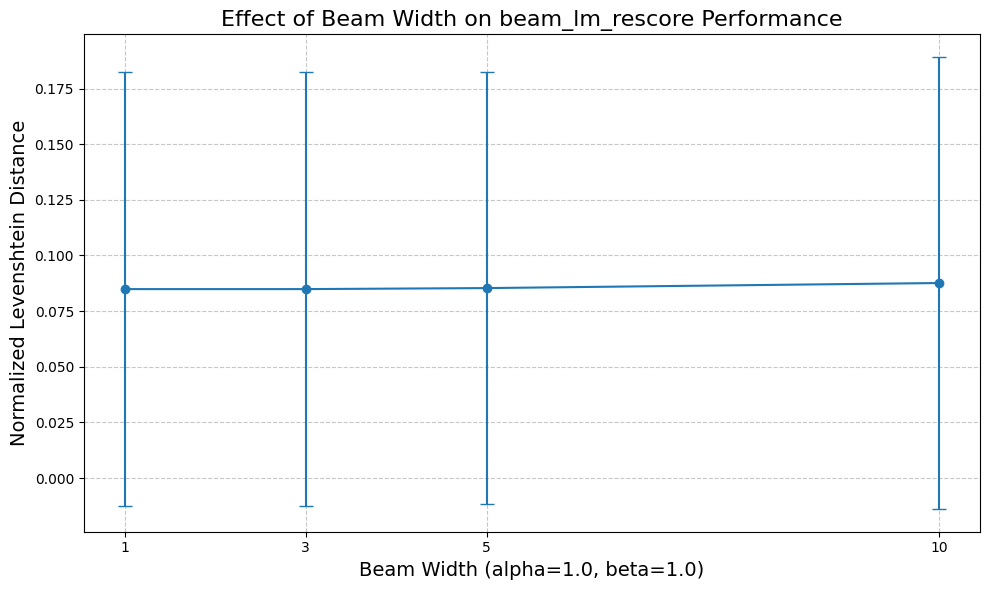

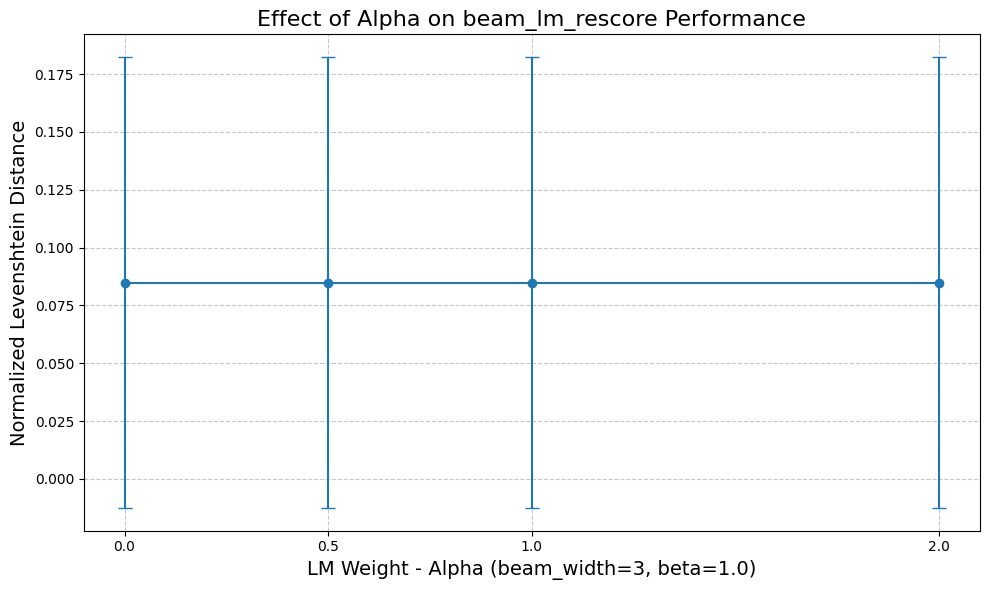

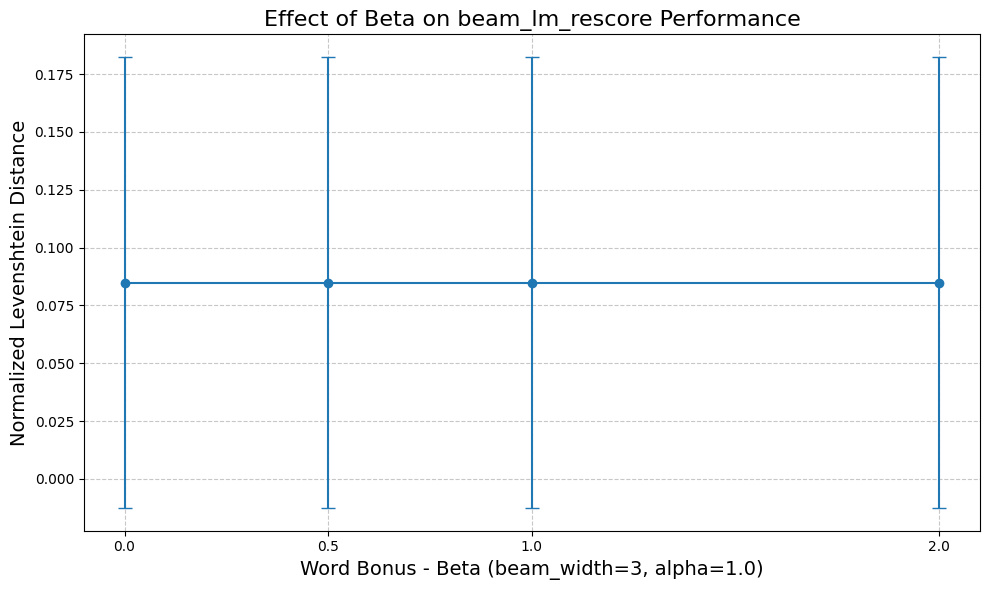

In [ ]:
run_experiments()

## Different LMs for beam_search_with_lm

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import Levenshtein
import torch
import torchaudio
import time
from tqdm import tqdm

In [ ]:
def compare_language_models():
    lm_paths = [
        "/content/3-gram.arpa.gz",
        "/content/3-gram.pruned.1e-7.arpa.gz",
        "/content/3-gram.pruned.3e-7.arpa.gz"
    ]

    beam_width = 3
    alpha = 1.0
    beta = 1.0

    results = {lm: {"distances": [], "times": []} for lm in lm_paths}

    samples = test_samples()

    print("Comparing different language models...")
    for lm_path in lm_paths:
        print(f"Testing {lm_path}...")
        decoder = Wav2Vec2Decoder(
            model_name="facebook/wav2vec2-base-960h",
            lm_model_path=lm_path,
            beam_width=beam_width,
            alpha=alpha,
            beta=beta
        )

        for audio_path, reference in tqdm(samples):
            audio_input, sr = torchaudio.load(audio_path)
            assert sr == 16000, "Audio sample rate must be 16kHz"

            start_time = time.time()
            transcript = decoder.decode(audio_input, method="beam_lm")
            end_time = time.time()

            processing_time = end_time - start_time
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())

            results[lm_path]["distances"].append(norm_dist)
            results[lm_path]["times"].append(processing_time)

    stats = {}
    for lm, data in results.items():
        stats[lm] = {
            "mean_distance": np.mean(data["distances"]),
            "std_distance": np.std(data["distances"]),
            "mean_time": np.mean(data["times"]),
            "std_time": np.std(data["times"]),
            "raw_distances": data["distances"],
            "raw_times": data["times"]
        }

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    lm_names = [os.path.basename(lm) for lm in lm_paths]
    mean_distances = [stats[lm]["mean_distance"] for lm in lm_paths]
    std_distances = [stats[lm]["std_distance"] for lm in lm_paths]

    plt.bar(lm_names, mean_distances, yerr=std_distances, capsize=5)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=12)
    plt.title('Transcription Quality by Language Model', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    mean_times = [stats[lm]["mean_time"] for lm in lm_paths]
    std_times = [stats[lm]["std_time"] for lm in lm_paths]

    plt.bar(lm_names, mean_times, yerr=std_times, capsize=5)
    plt.ylabel('Processing Time (seconds)', fontsize=12)
    plt.title('Processing Speed by Language Model', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('results/language_model_comparison.png', dpi=300)

    with open('results/language_model_results.txt', 'w') as f:
        f.write("LANGUAGE MODEL COMPARISON RESULTS\n")
        f.write("================================\n\n")
        f.write(f"Beam Width: {beam_width}, Alpha: {alpha}, Beta: {beta}\n\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n")
        f.write("Processing Time in seconds (lower is better)\n\n")

        for lm in lm_paths:
            name = os.path.basename(lm)
            f.write(f"MODEL: {name}\n")
            f.write(f"  Mean Distance: {stats[lm]['mean_distance']:.4f} (±{stats[lm]['std_distance']:.4f})\n")
            f.write(f"  Mean Time: {stats[lm]['mean_time']:.4f} seconds (±{stats[lm]['std_time']:.4f})\n")
            f.write(f"  Raw Distances: {[f'{d:.4f}' for d in stats[lm]['raw_distances']]}\n")
            f.write(f"  Raw Times: {[f'{t:.4f}' for t in stats[lm]['raw_times']]}\n\n")

        best_quality = min(lm_paths, key=lambda lm: stats[lm]["mean_distance"])
        best_speed = min(lm_paths, key=lambda lm: stats[lm]["mean_time"])

        f.write("SUMMARY:\n")
        f.write(f"  Best for quality: {os.path.basename(best_quality)}\n")
        f.write(f"  Best for speed: {os.path.basename(best_speed)}\n")

    fig, ax = plt.figure(figsize=(10, 4)), plt.subplot(111)

    ax.axis('off')
    ax.axis('tight')

    table_data = []
    for lm in lm_paths:
        name = os.path.basename(lm)
        table_data.append([
            name,
            f"{stats[lm]['mean_distance']:.4f}",
            f"{stats[lm]['mean_time']:.2f}s"
        ])

    table = ax.table(
        cellText=table_data,
        colLabels=["Language Model", "Mean Distance", "Mean Time"],
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    plt.title("Language Model Comparison Summary", fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig('results/language_model_table.png', dpi=300)

    return stats

Comparing different language models...
Testing /content/3-gram.arpa.gz...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8/8 [00:12<00:00,  1.56s/it]


Testing /content/3-gram.pruned.1e-7.arpa.gz...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Testing /content/3-gram.pruned.3e-7.arpa.gz...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8/8 [00:09<00:00,  1.19s/it]


{'/content/3-gram.arpa.gz': {'mean_distance': np.float64(0.08982952457077938),
  'std_distance': np.float64(0.10368502905674583),
  'mean_time': np.float64(1.1660744845867157),
  'std_time': np.float64(0.6433628364949233),
  'raw_distances': [0.03902439024390244,
   0.01090909090909091,
   0.006060606060606061,
   0.014423076923076924,
   0.0,
   0.2909090909090909,
   0.18888888888888888,
   0.16842105263157894],
  'raw_times': [2.241248369216919,
   1.9335358142852783,
   1.0819170475006104,
   1.4173274040222168,
   1.2531116008758545,
   0.3576323986053467,
   0.4715430736541748,
   0.5722801685333252]},
 '/content/3-gram.pruned.1e-7.arpa.gz': {'mean_distance': np.float64(0.08998144140615327),
  'std_distance': np.float64(0.1037570324914573),
  'mean_time': np.float64(1.088348627090454),
  'std_time': np.float64(0.5112087051334879),
  'raw_distances': [0.04390243902439024,
   0.007246376811594203,
   0.006060606060606061,
   0.014423076923076924,
   0.0,
   0.2909090909090909,
   0

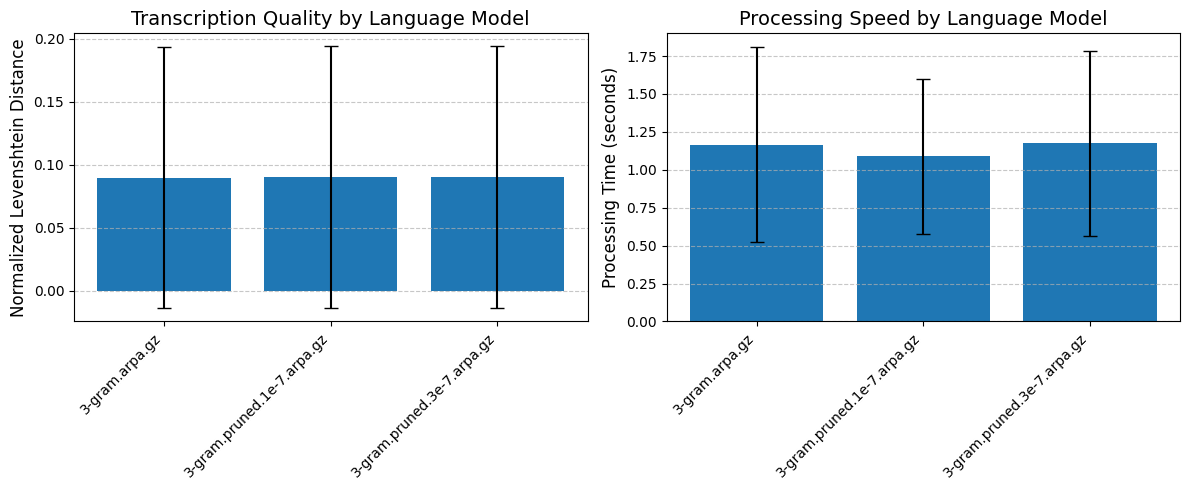

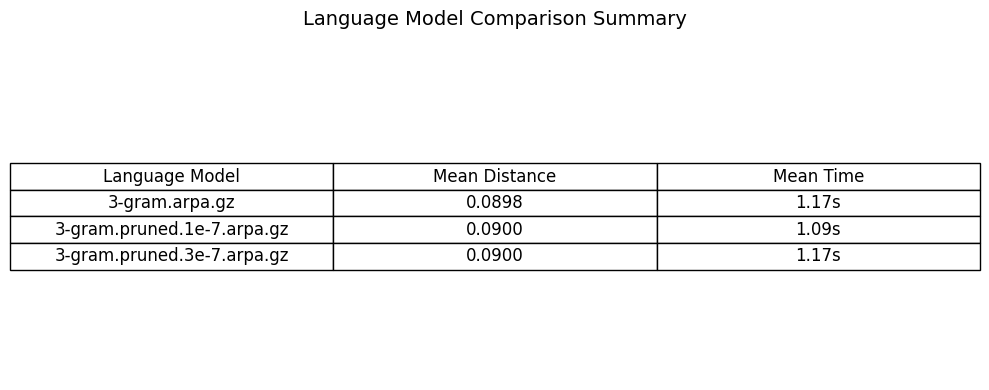

In [ ]:
compare_language_models()

## Different LMs for lm_rescore

In [ ]:
def compare_language_models_rescore():
    lm_paths = [
        "/content/3-gram.arpa.gz",
        "/content/3-gram.pruned.1e-7.arpa.gz",
        "/content/3-gram.pruned.3e-7.arpa.gz",
        "/content/4-gram.arpa.gz"
    ]

    beam_width = 3
    alpha = 1.0
    beta = 1.0

    results = {lm: {"distances": [], "times": []} for lm in lm_paths}

    samples = test_samples()

    print("Comparing different language models for lm_rescore...")
    for lm_path in lm_paths:
        print(f"Testing {lm_path}...")
        decoder = Wav2Vec2Decoder(
            model_name="facebook/wav2vec2-base-960h",
            lm_model_path=lm_path,
            beam_width=beam_width,
            alpha=alpha,
            beta=beta
        )

        for audio_path, reference in tqdm(samples):
            audio_input, sr = torchaudio.load(audio_path)
            assert sr == 16000, "Audio sample rate must be 16kHz"

            start_time = time.time()
            transcript = decoder.decode(audio_input, method="beam_lm_rescore")
            end_time = time.time()

            processing_time = end_time - start_time
            norm_dist = normalized_levenshtein(reference.strip(), transcript.strip())

            results[lm_path]["distances"].append(norm_dist)
            results[lm_path]["times"].append(processing_time)

    stats = {}
    for lm, data in results.items():
        stats[lm] = {
            "mean_distance": np.mean(data["distances"]),
            "std_distance": np.std(data["distances"]),
            "mean_time": np.mean(data["times"]),
            "std_time": np.std(data["times"])
        }

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    lm_names = [os.path.basename(lm) for lm in lm_paths]
    mean_distances = [stats[lm]["mean_distance"] for lm in lm_paths]
    std_distances = [stats[lm]["std_distance"] for lm in lm_paths]

    plt.bar(lm_names, mean_distances, yerr=std_distances, capsize=5)
    plt.ylabel('Normalized Levenshtein Distance', fontsize=12)
    plt.title('Transcription Quality by Language Model (Rescoring)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    mean_times = [stats[lm]["mean_time"] for lm in lm_paths]
    std_times = [stats[lm]["std_time"] for lm in lm_paths]

    plt.bar(lm_names, mean_times, yerr=std_times, capsize=5)
    plt.ylabel('Processing Time (seconds)', fontsize=12)
    plt.title('Processing Speed by Language Model (Rescoring)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('results/language_model_rescore_comparison.png', dpi=300)

    with open('results/language_model_rescore_results.txt', 'w') as f:
        f.write("LANGUAGE MODEL COMPARISON RESULTS FOR LM_RESCORE\n")
        f.write("=============================================\n\n")
        f.write(f"Beam Width: {beam_width}, Alpha: {alpha}, Beta: {beta}\n\n")
        f.write("Normalized Levenshtein Distance (lower is better)\n")
        f.write("Processing Time in seconds (lower is better)\n\n")

        for lm in lm_paths:
            name = os.path.basename(lm)
            f.write(f"MODEL: {name}\n")
            f.write(f"  Mean Distance: {stats[lm]['mean_distance']:.4f} (±{stats[lm]['std_distance']:.4f})\n")
            f.write(f"  Mean Time: {stats[lm]['mean_time']:.4f} seconds (±{stats[lm]['std_time']:.4f})\n\n")

        best_quality = min(lm_paths, key=lambda lm: stats[lm]["mean_distance"])
        best_speed = min(lm_paths, key=lambda lm: stats[lm]["mean_time"])

        f.write("SUMMARY:\n")
        f.write(f"  Best for quality: {os.path.basename(best_quality)}\n")
        f.write(f"  Best for speed: {os.path.basename(best_speed)}\n")

    return stats

Comparing different language models for lm_rescore...
Testing /content/3-gram.arpa.gz...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


Testing /content/3-gram.pruned.1e-7.arpa.gz...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8/8 [00:08<00:00,  1.02s/it]


Testing /content/3-gram.pruned.3e-7.arpa.gz...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


Testing /content/4-gram.arpa.gz...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


{'/content/3-gram.arpa.gz': {'mean_distance': np.float64(0.08489508948831798),
  'std_distance': np.float64(0.0975195981610057),
  'mean_time': np.float64(0.9911806881427765),
  'std_time': np.float64(0.529843698860421)},
 '/content/3-gram.pruned.1e-7.arpa.gz': {'mean_distance': np.float64(0.08489508948831798),
  'std_distance': np.float64(0.0975195981610057),
  'mean_time': np.float64(1.0054656565189362),
  'std_time': np.float64(0.5371272947800784)},
 '/content/3-gram.pruned.3e-7.arpa.gz': {'mean_distance': np.float64(0.08489508948831798),
  'std_distance': np.float64(0.0975195981610057),
  'mean_time': np.float64(1.0777034759521484),
  'std_time': np.float64(0.6573055471648642)},
 '/content/4-gram.arpa.gz': {'mean_distance': np.float64(0.08489508948831798),
  'std_distance': np.float64(0.0975195981610057),
  'mean_time': np.float64(1.087070345878601),
  'std_time': np.float64(0.6347413870398401)}}

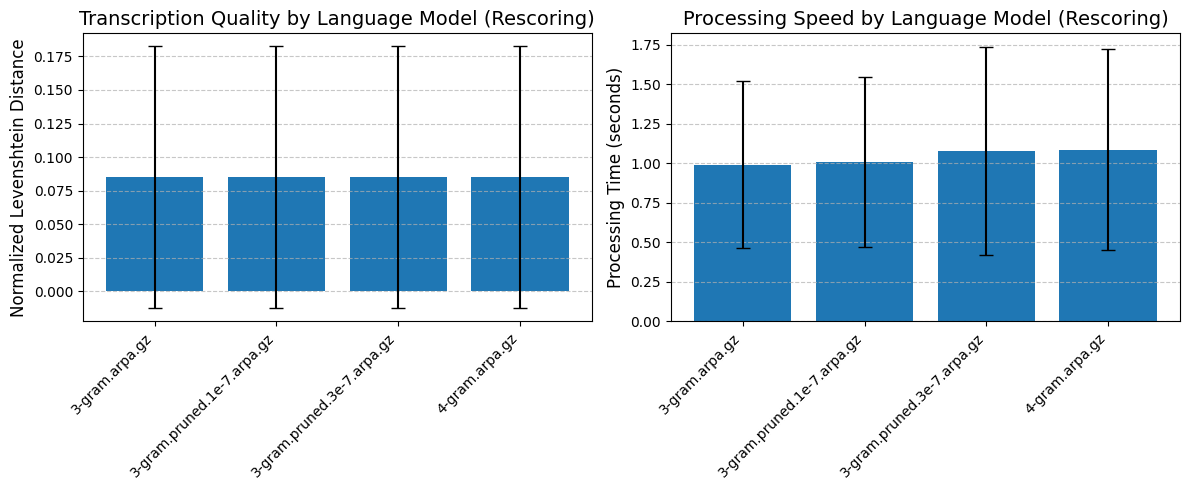

In [ ]:
compare_language_models_rescore()